# What's New in Marvin 2.1

## Marvin is Python 3.5+ compliant!

In [1]:
import matplotlib
%matplotlib inline

# only necessary if you have a local DB
from marvin import config
config.forceDbOff()

INFO: No release version set. Setting default to MPL-6


# Web
## Interactive NASA-Sloan Atlas (NSA) Parameter Visualization
http://www.sdss.org/dr13/manga/manga-target-selection/nsa/
- Drag-and-drop parameter names from table onto axis name to change quantity on axis
- Click Box-and-whisker button and scroll horizontally to see distributions of selected parameters.
- Click on arrow in upper right corner of table to show all parameters.
Python snippets (Cube, Spectrum, Map, Query)

# Tools
## NASA-Sloan Atlas (NSA) Parameters
`Cube.nsa` or `Maps.nsa`

In [7]:
from marvin.tools.cube import Cube
plateifu = '8485-1901'
cube = Cube(plateifu=plateifu)
print(cube)

<Marvin Cube (plateifu='8485-1901', mode='local', data_origin='db')>


In [5]:
list(cube.nsa.keys())

DEBUG:Brain:get_nsa_data: getting NSA data for mangaid='1-209232' with source='nsa', mode='auto'
DEBUG:Brain:get_nsa_data: running auto mode mode.
DEBUG:Brain:get_nsa_data: getting NSA data for mangaid='1-209232' with source='nsa', mode='local'


['elpetro_mtol',
 'elpetro_logmass',
 'sersic_ba',
 'elpetro_absmag_i',
 'isdss',
 'elpetro_absmag_r',
 'elpetro_absmag_F_i',
 'petro_flux',
 'elpetro_mag_g_r',
 'elpetro_absmag_z',
 'elpetro_absmag_F',
 'platequality',
 'sersic_ok',
 'qstokes',
 'sersic_flux_ivar',
 'elpetro_absmag_N',
 'elpetro_absmag_u',
 'sersic_th50',
 'elpetro_mag_u_z',
 'profmean_ivar',
 'elpetro_mag_r_z',
 'zsrc',
 'elpetro_absmag_g_z',
 'fiberid',
 'sersic_n',
 'zdist',
 'pid',
 'sersic_logmass',
 'sersic_mtol',
 'plug_ra',
 'racat',
 'izcat',
 'elpetro_apcorr_self',
 'xpos',
 'in_dr7_lss',
 'elpetro_kcoeff',
 'itwodf',
 'elpetro_theta',
 'zsdssline',
 'mag',
 'elpetro_absmag_u_z',
 'phistokes',
 'elpetro_absmag_i_z',
 'petro_ba90',
 'aid',
 'ustokes',
 'subdir',
 'elpetro_absmag_F_r',
 'elpetro_absmag_N_z',
 'elpetro_absmag_r_i',
 'profmean',
 'elpetro_mag_u_r',
 'elpetro_amivar',
 'petro_th50',
 'elpetro_mag_r_i',
 'ined',
 'elpetro_th90',
 'elpetro_mag_u_i',
 'elpetro_kcorrect',
 'sersic_kcorrect',
 'elpetr

In [6]:
# get the mass of the galaxy
cube.nsa.elpetro_logmass

9.565475912843823

## Map Plotting
### Completely redesigned map plotting
- uses DAP bitmasks (NOVALUE, BADVALUE, MATHERROR, BADFIT, and DONOTUSE) and masks spaxels with `ivar = 0`
- uses hatching for regions with data (i.e., a spectrum) but no measurement by the DAP
- clips at 5th and 95th percentiles (10th and 90th percentiles for velocity and sigma plots)
- velocity plots are symmetric about 0
- minimum SNR is 1

In [8]:
from marvin.tools.maps import Maps
maps = Maps(plateifu=plateifu)
print(maps)

<Marvin Maps (plateifu='8485-1901', mode='local', data_origin='db', bintype='SPX', template='GAU-MILESHC')>


In [9]:
haflux = maps['emline_gflux_ha_6564']
print(haflux)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 1e-17 erg / (cm2 s spaxel)


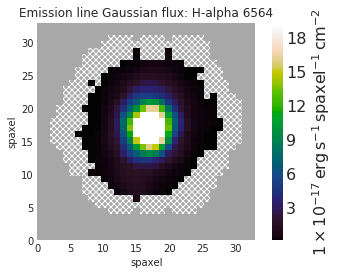

In [10]:
fig, ax = haflux.plot()

In [13]:
stvel = maps['stellar_vel']

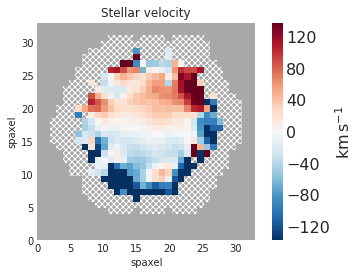

In [14]:
fig, ax = stvel.plot()

In [15]:
stsig = maps['stellar_sigma']

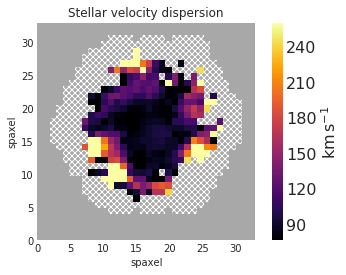

In [16]:
fig, ax = stsig.plot()

## BPT Diagrams
Classify spaxels in a given Maps object according to BPT diagrams!  Will return spaxel classifications for star-forming, composite, seyfert, liner, and ambiguous.  **Note: there is currently a bug in the BPT code that returns incorrect composite spaxels.  This is fixed in a 2.1.2 patch that will be released soon.**

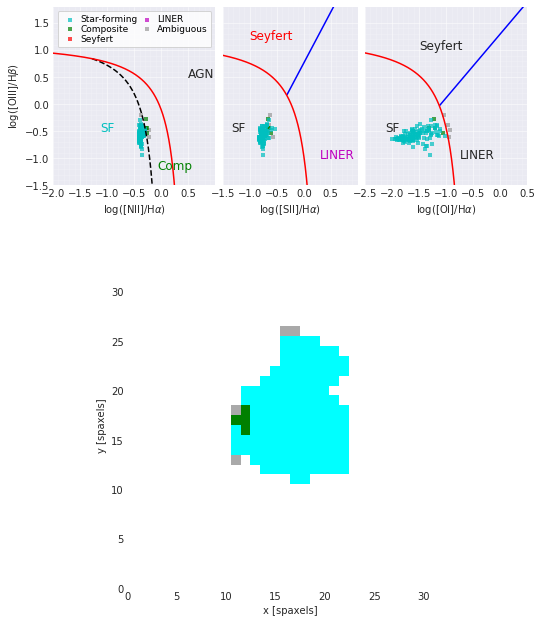

In [18]:
masks, fig, ax = maps.get_bpt()

In [19]:
# this is the global mask for star-forming spaxels.  It can be used to do selections on any other map property. 
masks['sf']['global']

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [20]:
# let's look at the h-alpha flux values for the star-forming spaxels
haflux.value[masks['sf']['global']]

array([ 2.61238 ,  2.3186  ,  3.23694 ,  4.29315 ,  4.7633  ,  4.6949  ,
        3.83668 ,  3.00391 ,  2.10722 ,  1.2315  ,  0.808691,  3.33439 ,
        5.41251 ,  6.92827 ,  8.52238 ,  9.64208 ,  8.78392 ,  6.31557 ,
        3.16403 ,  2.18025 ,  1.31525 ,  1.17475 ,  1.91892 ,  4.07317 ,
        6.90582 , 10.3638  , 13.5446  , 15.905   , 14.9757  , 10.6206  ,
        5.94007 ,  2.72092 ,  1.73805 ,  1.43055 ,  2.27942 ,  5.13315 ,
        8.94395 , 15.0203  , 19.7518  , 23.0878  , 21.9951  , 16.3735  ,
        9.2675  ,  3.76588 ,  2.09377 ,  1.53463 ,  6.32198 , 11.4821  ,
       19.3324  , 25.9203  , 29.9385  , 27.2771  , 20.6289  , 11.3811  ,
        5.50812 ,  2.84673 ,  7.41647 , 13.6795  , 21.2959  , 27.8799  ,
       30.7445  , 27.7567  , 20.5631  , 13.3692  ,  6.78166 ,  3.62738 ,
        7.69176 , 12.631   , 19.2143  , 25.3789  , 27.9655  , 25.1701  ,
       19.0827  , 12.6037  ,  7.21636 ,  3.78515 ,  2.61258 ,  6.27947 ,
        9.45194 , 14.354   , 19.341   , 22.6235  , 

In [21]:
# let's get the stellar velocity values for the star-forming spaxels
stvel.value[masks['sf']['global']]

array([-30.0236  ,  -7.57094 , -48.597   , -50.8133  , -49.3935  ,
       -40.0258  , -31.9925  , -22.8671  , -20.4737  , -20.5838  ,
       -67.8342  , -18.9473  , -34.8496  , -39.3081  , -36.2838  ,
       -30.801   , -25.654   , -27.3124  , -31.4655  , -32.1877  ,
       -47.4545  , -15.519   ,  -5.30051 , -21.0384  , -32.094   ,
       -32.3173  , -25.3433  , -19.2887  , -16.0028  , -21.6344  ,
       -26.5744  , -31.1291  , -28.2956  , -28.3708  , -18.5553  ,
       -25.4309  , -22.6039  , -18.5813  , -13.5006  ,  -9.4287  ,
        -8.75091 , -10.2122  , -18.5646  , -20.8729  , -17.6147  ,
       -23.6381  , -12.9698  , -10.6084  ,  -8.78304 ,  -5.87197 ,
        -3.24141 ,  -1.05779 ,  -1.81483 ,  -8.06158 ,  -5.23015 ,
        -0.237407,  -2.87323 ,  -0.773513,  -0.409809,   4.00251 ,
         7.43025 ,  10.6331  ,  10.1801  ,   8.8856  ,   5.38405 ,
         6.74793 ,   4.30429 ,   6.46285 ,   8.67415 ,  12.391   ,
        18.7887  ,  24.115   ,  26.2952  ,  23.1974  ,  14.908

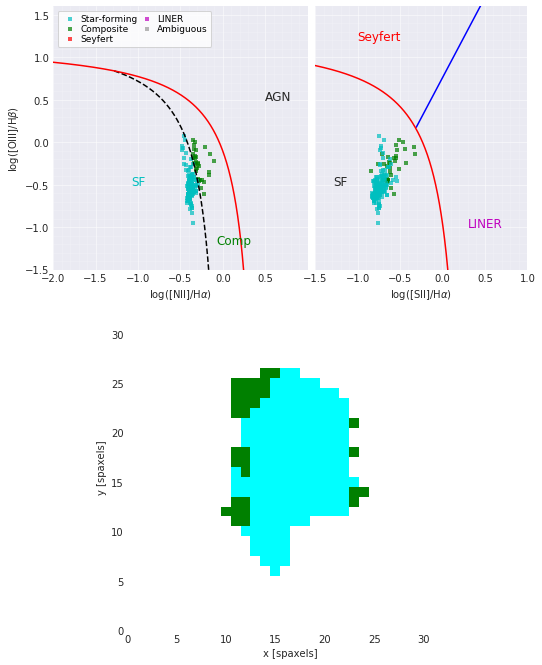

In [24]:
# the BPT uses a strict classification scheme based on the BPTs for NII, SII, and OI.  If you do not want to use OI, 
# you can turn it off
mask, fig, ax = maps.get_bpt(use_oi=False)

the BPT uses a default minimum SNR threshold cutoff of 3 on each emission line.  You can change this globally using the **snr** keyword. **Note: this keyword will change to snrmin in the upcoming 2.12 patch.**


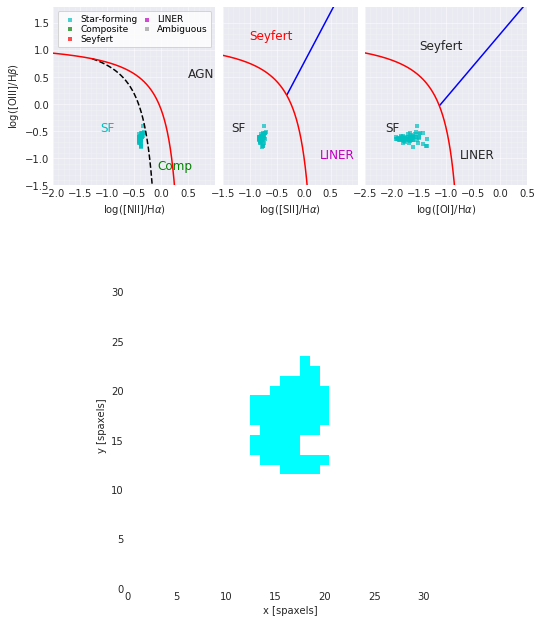

In [25]:
masks, fig, ax = maps.get_bpt(snr_min=5)

or you change it for individual emission lines.  It will use the default value of 3 for all lines you do not specify.

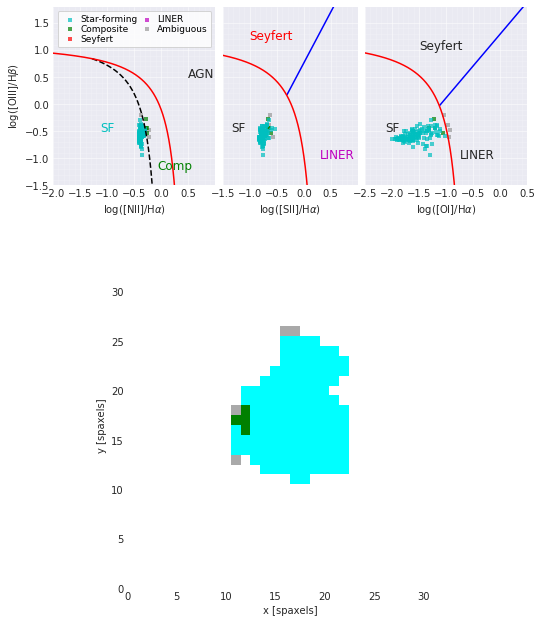

In [26]:
masks, fig, ax = maps.get_bpt(snr_min={'ha':5, 'sii':1})

### [Visual Guide to Marvin Tools](https://api.sdss.org/doc/manga/marvin/tools/visual-guide.html#visual-guide)

## We Want Your Feedback
- "Provide Feeback" button in Marvin-web that opens a new GitHub Issue.
- If you don't have a GitHub account, it takes under 3 minutes to create one.
- Please describe your problem as well as you can (including copying in error messages), and we can handle labeling and assigning your Issue.